In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#look at numeric and categorical values seperately
df_num = data[data.columns[:-1]]
df_cat = data[['Outcome']]

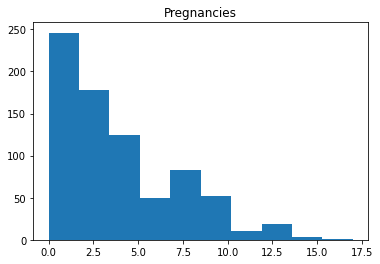

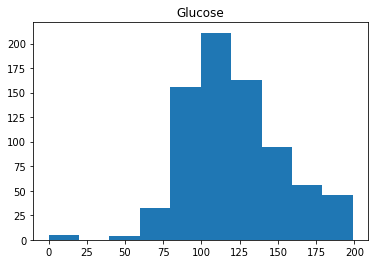

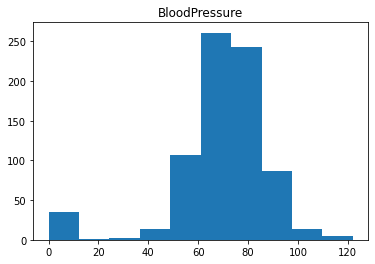

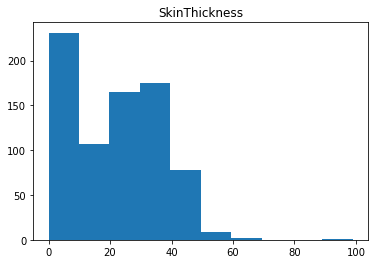

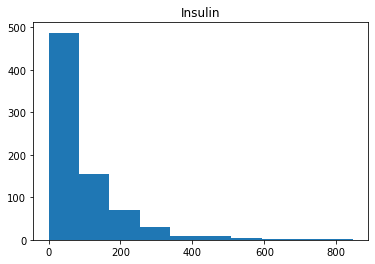

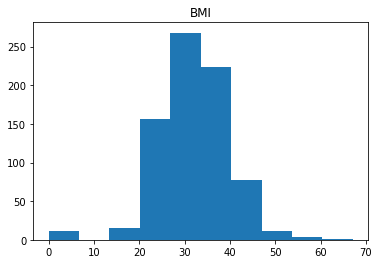

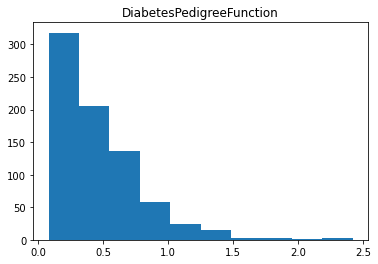

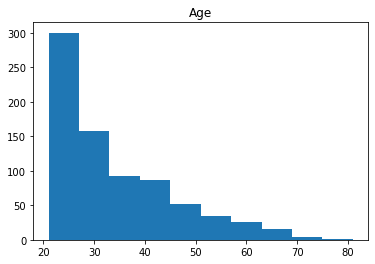

In [3]:
import matplotlib.pyplot as plt

#Look at histogram of each numeric variable 

for i in df_num.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805    

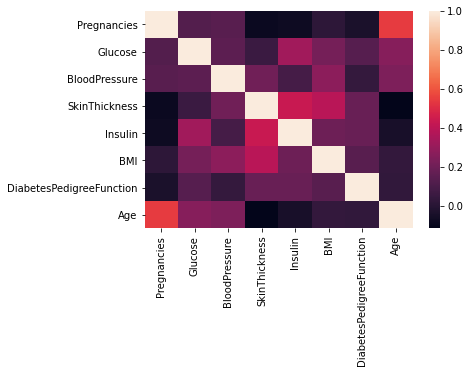

In [4]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [5]:
# compare diabetes outcome across Age, BMI, BloodPressure, DPF, Glucode, Insulin, Pregnancies, & SkinThickness 
pd.pivot_table(data, index = 'Outcome', values = data.columns[:-1])

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,3.298000,19.664000
1,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,4.865672,22.164179


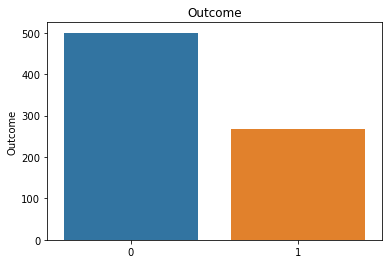

In [6]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [7]:
print(data[(data.Outcome == 1)]['Outcome'].count())
print(data[(data.Outcome == 0)]['Outcome'].count())


268
500


In [8]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [9]:
df_cat

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [10]:
#Split into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_num,df_cat, test_size=0.3, random_state=45, stratify=df_cat)

# KNN Classification

<ipython-input-11-ad63e7180802>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-11-ad63e7180802>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-11-ad63e7180802>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-11-ad63e7180802>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-11-ad63e7180802>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

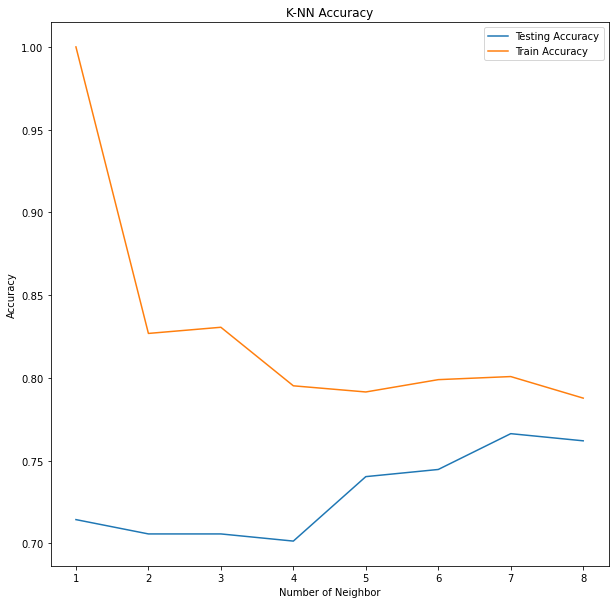

In [11]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i]=knn.score(X_train, y_train)
    
    test_accuracy[i]=knn.score(X_test, y_test)

plt.figure(figsize=(10,10))
plt.title("K-NN Accuracy")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.legend()
plt.xlabel("Number of Neighbor")
plt.ylabel("Accuracy")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

<ipython-input-12-3d1035073b51>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [13]:
#KNN Model Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_pred))

[[131  19]
 [ 35  46]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

ROC-AUC: 0.7206172839506172


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/khristionlambert/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/khristionlambert/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#Logistic Regression Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_pred))

[[133  17]
 [ 34  47]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.73      0.58      0.65        81

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.78      0.77       231

ROC-AUC: 0.7334567901234568


# Support Vector Classifier

In [16]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

/Users/khristionlambert/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
#SVC Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[142   8]
 [ 41  40]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       150
           1       0.83      0.49      0.62        81

    accuracy                           0.79       231
   macro avg       0.80      0.72      0.74       231
weighted avg       0.80      0.79      0.77       231

ROC-AUC: 0.720246913580247
0.7878787878787878


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<ipython-input-18-3378b86a15ab>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [19]:
#Random Forest Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_pred))


[[133  17]
 [ 32  49]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231

ROC-AUC: 0.7458024691358025


Confusion Matrix Order: [ True Negative False positive] [ False Negative True Positive ]

The random forest model performed the best based on it's accuracy score, f1 score, and results of the confusion matrix. Based on the results of the confusion matrix we see that it was predicted that 32 people would be given a false negative diabetes diagnosis. Amongst all of the models this was the lowest value. This is an important value to look at because this is an extremely key feature to examine. If people are falsely being told that they won't get diabetes and they actually do, this can be deadly. Where as for the 17 people getting a false positive, this isn't as costly. If people are falsely told that they will get diabetes they can put in preventive measures to ensure they reduce the chance of them getting it. However, while they are doing these interventions it will only do good for them because it was a false positive diagnoses meaning that they won't actually get diabetes.

In [20]:
from sklearn.model_selection import GridSearchCV 

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [10,20,25,50],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [2, 4, 5, 10],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2],
                                  'min_samples_split': [2,3,5]}
                                  
rf_grid = GridSearchCV(rf, param_grid = param_grid,cv = 5, verbose = True, n_jobs = -1)
best_rf_model = rf_grid.fit(X_train,y_train)

print(best_rf_model.best_params_)
print('Accuracy', best_rf_model.best_score_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   38.0s


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Accuracy 0.7840602284527518


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   50.5s finished
/Users/khristionlambert/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
